In [1]:
import torch
from sparsemax import Sparsemax
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from model import unidirectional as classifier


df_pos = pd.read_parquet("dcr_alpha_LTX051_LN1_M13_a-LTX051_LN1_M13_b.parquet")
df_neg = pd.read_parquet("dcr_HCW_0003_6M_1_alpha.parquet")


In [2]:
%%script --false
embeddings_pos = torch.from_numpy(df_pos.values).to(torch.float32)
embeddings_neg = torch.from_numpy(df_neg.values).to(torch.float32)
model = classifier()
criterion = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr = 1e-3)

pos_trainloss = []
neg_trainloss = []
train_loss = []

for i in tqdm(range(20)):
    ypred = model(embeddings_pos)
    loss_pos = criterion(torch.ones((1, 1)), ypred)
    pos_trainloss.append(loss_pos.data.tolist())

    ypred = model(embeddings_neg)
    loss_neg = criterion(torch.zeros((1, 1)), ypred)
    neg_trainloss.append(loss_neg.data.tolist())

    loss = loss_pos + loss_neg
    train_loss.append(loss.data.tolist())

    optim.zero_grad()
    loss.backward()
    optim.step()

plt.scatter([i for i in range(len(train_loss))], train_loss, marker = ".", c = "b")
plt.scatter([i for i in range(len(pos_trainloss))], pos_trainloss, marker = ".", c = "r")
plt.scatter([i for i in range(len(neg_trainloss))], neg_trainloss, marker = ".", c = "g")
plt.show()

Couldn't find program: '--false'


  0%|          | 0/20 [00:00<?, ?it/s]

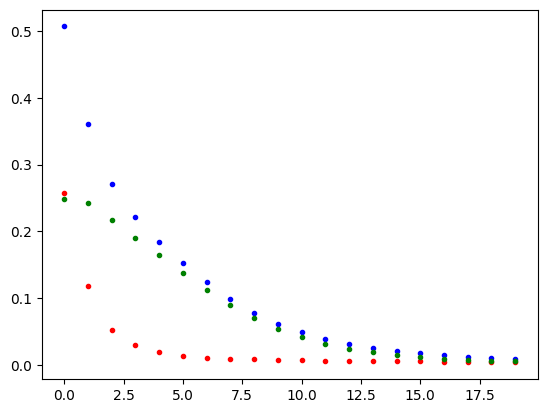

In [3]:
embeddings_pos = torch.from_numpy(df_pos.values).to(torch.float32).cuda()
embeddings_neg = torch.from_numpy(df_neg.values).to(torch.float32).cuda()
model = classifier().cuda()
criterion = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr = 1e-3)

pos_trainloss = []
neg_trainloss = []
train_loss = []

for i in tqdm(range(20)):
    ypred = model(embeddings_pos)
    loss_pos = criterion(torch.ones((1, 1)).cuda(), ypred)
    pos_trainloss.append(loss_pos.data.tolist())

    ypred = model(embeddings_neg)
    loss_neg = criterion(torch.zeros((1, 1)).cuda(), ypred)
    neg_trainloss.append(loss_neg.data.tolist())

    loss = loss_pos + loss_neg
    train_loss.append(loss.data.tolist())

    optim.zero_grad()
    loss.backward()
    optim.step()

plt.scatter([i for i in range(len(train_loss))], train_loss, marker = ".", c = "b")
plt.scatter([i for i in range(len(pos_trainloss))], pos_trainloss, marker = ".", c = "r")
plt.scatter([i for i in range(len(neg_trainloss))], neg_trainloss, marker = ".", c = "g")
plt.show()